# Exploratory Data Analysis (Online Clothing Store)

## Import & Load Data

In [26]:
# Importing libraries
import numpy as np
import pandas as pd

In [4]:
# File path
file_path = "C:/Users/HP/Desktop/My Data Science Journey/Python/Portfolio Project/Why did sales drop/dataset/clothing_sales_jan_jun_2024.xlsx"

# load data from excel
df = pd.read_excel(file_path)

# Make copy of dataset
df_clothing_sales = df.copy()

In [5]:
# check 1st 5 rows
df_clothing_sales.head()

,Date,Region,Category,Subcategory,Customer_Type,Units_Sold,Unit_Price,Discount,Sales (USD)
0,2024-01-01,West,Handwear,Gloves,Returning,1,18.95,0.04,18.11
1,2024-01-01,East,Legwear,Trousers,Returning,4,28.57,0.07,106.85
2,2024-01-01,North,Bodywear,Jacket,New,4,99.53,0.06,373.55
3,2024-01-01,South,Handwear,Wristband,New,3,11.12,0.01,32.89
4,2024-01-01,West,Footwear,Boots,Returning,3,115.65,0.04,333.69


### Basic Data Inspection 

Before any visualizations or statistical analysis, I'll first check: <br>

1. The shape of the dataset (rows × columns)
2. Data types of each column
3. . Any missing values?

In [8]:
# Basic data inspection

# 1. Shape of the dataset
print("Shape of dataset:", df_clothing_sales.shape)

# 2. Data types
print("\nData types:")
print(df_clothing_sales.dtypes)

# 3. Missing values
print("\nMissing values:")
print(df_clothing_sales.isnull().sum())

Shape of dataset: (6648, 9)

Data types:
Date             datetime64[ns]
Region                   object
Category                 object
Subcategory              object
Customer_Type            object
Units_Sold                int64
Unit_Price              float64
Discount                float64
Sales (USD)             float64
dtype: object

Missing values:
Date             0
Region           0
Category         0
Subcategory      0
Customer_Type    0
Units_Sold       0
Unit_Price       0
Discount         0
Sales (USD)      0
dtype: int64


__________________________________
## Summary Statistics

Here, I’ll:

1. Check numeric summaries — especially Unit_Price, Discount, Units_Sold, and Sales (USD).
2. Check the total sum of Sales (USD), Discount, Units_Sold.
3. Explore categorical distributions — like counts of Region, Customer_Type, Category, etc.

I'm doing all these to understand central tendencies, spread, and any obvious outliers or patterns in the data.

In [15]:
# Summary statistics for numeric columns
df_clothing_sales.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
Units_Sold,6648.0,2.500752,1.110286,1.00,2.00,3.000,3.0000,4.00
Unit_Price,6648.0,37.490871,30.048882,5.00,14.73,27.450,49.3625,149.94
Discount,6648.0,0.082393,0.056312,0.00,0.05,0.080,0.1100,0.30
Sales (USD),6648.0,85.926232,84.544534,3.87,29.38,55.845,111.6700,580.19


In [30]:
# Total sum of Sales (USD), Discount, Units_Sold
total_sum = df[['Sales (USD)', 'Discount', 'Units_Sold']].sum()
total_sum

Sales (USD)    571237.59
Discount          547.75
Units_Sold      16625.00
dtype: float64

In [31]:
# Total sum of Discount given out in dollars
discount_dollars = (df['Unit_Price'] * df['Units_Sold'] * df['Discount']).sum()
discount_dollars

50811.513300000006

______________________________
#### Summary Statistics Interpretation (Jan–Jun 2024 Sales Data)

Between January and June 202,a total unit of **16,625** was sold. The average person  bought **2 to 3 clothing items per order**. Most people didn’t buy more than four items at once


The **average price** of an item was around **37 dollars**, but prices varied quite a bit — from as low as **5 dollars** (for simple items like caps or socks) to about **150 dollars** (likely more premium items like jackets or branded sneakers). This variety suggests the store sells both budget and mid-range fashion

The **total discount** given was **547.75** having a worth of **850,811.51 dollars**. 
On average,most  customers received about an **8% discount** on their purchases, with some getting up to **30% off**, probably during sales or special promotions in months like April

The **total** sales from January to June  was about **571,237.59 dollars**. While **sales** for  each transaction brought in about **86 dollars on average**, though it ranged widely, **smaller purchases** were **under 10 dollars**, while some larger orders went **over 500 dollars**.


____________________
## Frequency counts for categorical columns

In [22]:
# Frequency count for category
print("\nCategory Counts:")
print(df_clothing_sales['Category'].value_counts())


Category Counts:
Category
Headwear    1364
Bodywear    1350
Legwear     1331
Handwear    1318
Footwear    1285
Name: count, dtype: int64


In [23]:
# Frequency count for Subcategory
print("\nSubcategory Counts:")
print(df_clothing_sales['Subcategory'].value_counts())


Subcategory Counts:
Subcategory
Wristband    673
Gloves       645
Headband     486
Jacket       469
Jeans        454
Sweater      453
Shorts       446
Hat          445
Sneakers     443
Cap          433
Trousers     431
T-shirt      428
Sandals      427
Boots        415
Name: count, dtype: int64


In [24]:
# Frequency count for Customer Type
print("\nCustomer Type Counts:")
print(df_clothing_sales['Customer_Type'].value_counts())



Customer Type Counts:
Customer_Type
Returning    4605
New          2043
Name: count, dtype: int64


In [25]:
# Frequency count for Region
print("\nRegion Counts:")
print(df_clothing_sales['Region'].value_counts())


Region Counts:
Region
North    1756
West     1668
East     1623
South    1601
Name: count, dtype: int64


________________________________
#### Categorical Counts Interpretation

From January to June 2024, the online clothing store saw a fairly balanced number of purchases across different types of clothing. Headwear like hats and caps was the most commonly bought category, followed closely by items like bodywear (e.g., T-shirts and jackets), legwear, and so on. This shows that customers shop across all categories and not just one type of clothing.

Looking into specific products, wristbands and gloves were the most frequently purchased items. These are probably affordable accessories that customers like to add to their orders. On the other hand, larger items like boots and jackets were still bought regularly, but just not as often.

Looking at who is shopping, about 7 out of every 10 purchases came from returning customers, showing that people like the store enough to come back. At the same time, new customers made up a healthy share, which is a good sign that the store is still attracting fresh interest.

Finally, in terms of where customers are coming from, sales were spread quite evenly across all four regions: North, West, East, and South. The North had the most orders, but not by a big margin. This shows that the store likely has good reach and consistent service across regions.

_________________________________________
## Visualization
I'll begin by exploring the following:

1. Sales by Product Category – Which categories generate the most revenue?
2. Units Sold by Region – Which region buys more in terms of volume?
3. Average Discount by Customer Type – Are discounts skewed toward new or returning customers?

These will help uncover initial patterns about what, where, and to whom the business sells

In [32]:
# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
sns.set(style="whitegrid")

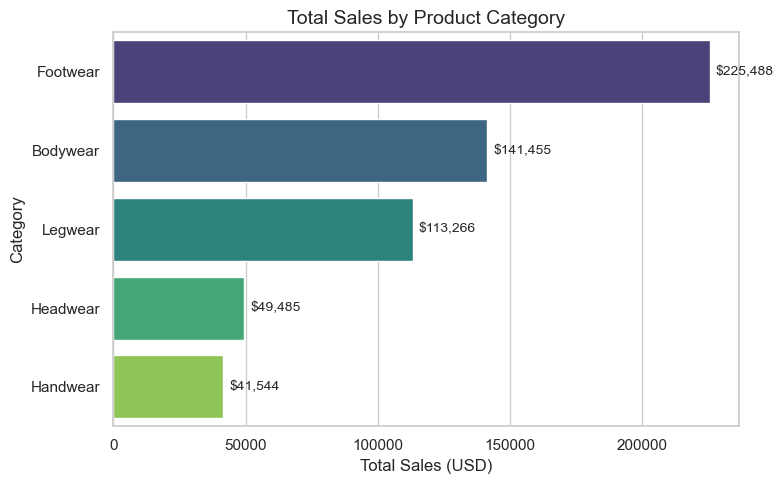

In [38]:
# Total Sales by Category
category_sales = df.groupby('Category')['Sales (USD)'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=category_sales.values, y=category_sales.index, palette="viridis")

# Add value labels to each bar
for i, value in enumerate(category_sales.values):
    ax.text(value + 0.01 * max(category_sales),  # x-position (slightly offset from bar)
            i,                                   # y-position (aligned with bar)
            f'${value:,.0f}',                   # Format with commas and dollar sign
            ha='left', va='center',              # Alignment
            fontsize=10)

plt.title("Total Sales by Product Category", fontsize=14)
plt.xlabel("Total Sales (USD)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

________________________
Footware category had was the highest with a total sale of 225,488 dollars; followed by Bodyware 141,455 dollars, Legware, 113,266 dollars.
Head and hand wear had a total sale of 49,485 dollars and 41,544 dollars respectively. 

To investigate what really drove the high sales in Footwear, I’ll look at:

1. Total Units Sold by Category – To see if high sales came from high volume.
2. Average Unit Price by Category – To see if prices are higher in Footwear.
3. Total Discount Given by Category – To see if generous discounts drove demand.

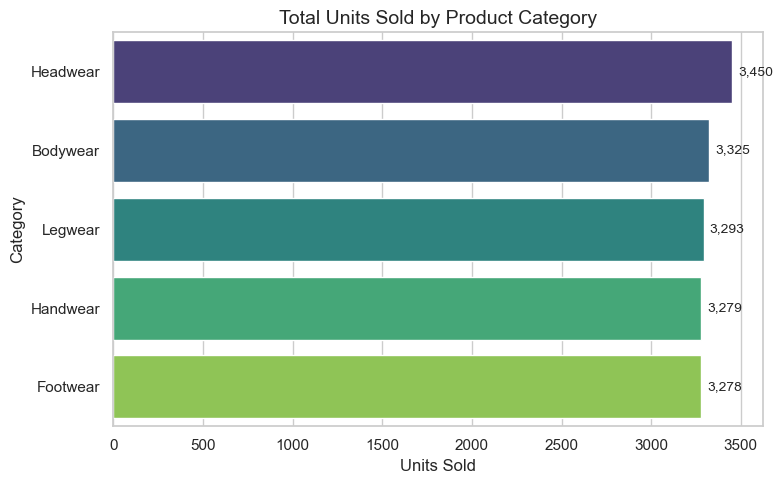

In [44]:
# Total Units Sold by Category – To see if high sales came from high volume.
category_units = df.groupby('Category')['Units_Sold'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
bx = sns.barplot(x=category_units.values, y=category_units.index, palette="viridis")

# Add value labels to each bar
for i, value in enumerate(category_units.values):
    bx.text(value + 0.01 * max(category_units),  # x-position (slightly offset from bar)
            i,                                   # y-position (aligned with bar)
            f'{value:,.0f}',                   # Format with commas
            ha='left', va='center',              # Alignment
            fontsize=10)

plt.title("Total Units Sold by Product Category", fontsize=14)
plt.xlabel("Units Sold")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

In [45]:
df.groupby('Category')['Units_Sold'].sum().sort_values(ascending=False)

Category
Headwear    3450
Bodywear    3325
Legwear     3293
Handwear    3279
Footwear    3278
Name: Units_Sold, dtype: int64

__________________________________
Even though Footwear had the highest total sales (over $225,000), it actually had the lowest number of units sold, just 3,278 units, slightly below Handwear. Meanwhile, categories like Headwear sold the most units (3,450), followed by Bodywear (3,325) and Legwear (3,293).

**This means Footwear isn’t the top seller because of high volume, it’s likely because footwear items are more expensive on average.**

In [50]:
df.groupby('Category')['Unit_Price'].median().sort_values(ascending=False)

Category
Footwear    74.990
Bodywear    47.450
Legwear     36.230
Headwear    14.805
Handwear    13.080
Name: Unit_Price, dtype: float64

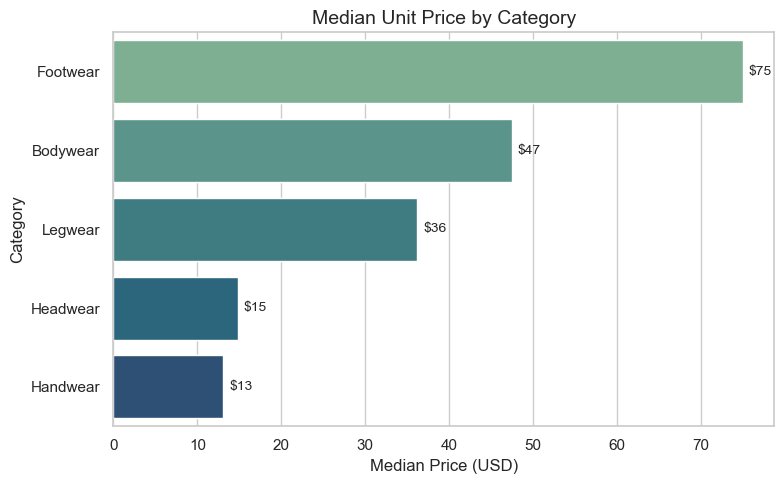

In [54]:
# Average Unit Price by Category
median_price = df.groupby('Category')['Unit_Price'].median().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
cx = sns.barplot(x=median_price.values, y=median_price.index, palette="viridis")

# Add value labels to each bar
for i, value in enumerate(median_price.values):
    cx.text(value + 0.01 * max(median_price),  # x-position (slightly offset from bar)
            i,                                   # y-position (aligned with bar)
            f'${value:,.0f}',                   # Format with commas
            ha='left', va='center',              # Alignment
            fontsize=10)
    
sns.barplot(x=median_price.values, y=median_price.index, palette="crest")
plt.title("Median Unit Price by Category", fontsize=14)
plt.xlabel("Median Price (USD)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


**Based on the bar chart, Footwear is the top seller because its median price is higher than other categories.**

In [59]:
# Total Discount by Category
df.groupby('Category')['Discount'].median().sort_values(ascending=False)

Category
Footwear    0.08
Handwear    0.08
Headwear    0.08
Bodywear    0.07
Legwear     0.07
Name: Discount, dtype: float64

Footwear didn’t receive significantly more discount overall compared to other categories.

This suggests high sales in Footwear are driven more by higher prices rather than heavier discounting. And thesame is true for other categories

The small difference between categories (0.07 vs 0.08) indicates discounts are relatively consistent across product types.